In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import sklearn

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
car_df = pd.read_csv(r'data\car data.csv')

In [3]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_df.shape

(301, 9)

In [5]:
car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [6]:
categorical_features = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

In [7]:
[print(col, car_df[col].unique()) for col in categorical_features]

Fuel_Type ['Petrol' 'Diesel' 'CNG']
Seller_Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owner [0 1 3]


[None, None, None, None]

In [8]:
# The dataset has both cars and bikes

car_df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [9]:
car_df.Year.unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [10]:
# Create a variable car_age

def carAge(s1):
    curr_year = datetime.datetime.now().year
    carAge = curr_year - s1
    return carAge

In [11]:
car_df['carAge'] = car_df.Year.apply(carAge)
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,carAge
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [12]:
# One hot encode categorical features

df = pd.get_dummies(car_df, columns=['Fuel_Type','Seller_Type', 'Transmission', 'Owner'], drop_first=True)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,carAge,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1,Owner_3
0,ritz,2014,3.35,5.59,27000,7,0,1,0,1,0,0
1,sx4,2013,4.75,9.54,43000,8,1,0,0,1,0,0
2,ciaz,2017,7.25,9.85,6900,4,0,1,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,10,0,1,0,1,0,0
4,swift,2014,4.60,6.87,42450,7,1,0,0,1,0,0


In [13]:
# drop Car_Name and Year from df 

df.drop('Car_Name', axis=1, inplace=True)
df.drop('Year', axis=1, inplace=True)

df.head()

,Selling_Price,Present_Price,Kms_Driven,carAge,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1,Owner_3
0,3.35,5.59,27000,7,0,1,0,1,0,0
1,4.75,9.54,43000,8,1,0,0,1,0,0
2,7.25,9.85,6900,4,0,1,0,1,0,0
3,2.85,4.15,5200,10,0,1,0,1,0,0
4,4.60,6.87,42450,7,1,0,0,1,0,0


In [14]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,carAge,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1,Owner_3
Selling_Price,1.000000,0.878983,0.029187,-0.236141,0.552339,-0.540571,-0.550724,-0.367128,-0.098318,-0.024591
Present_Price,0.878983,1.000000,0.203647,0.047584,0.473306,-0.465244,-0.512030,-0.348715,-0.092636,0.107723
Kms_Driven,0.029187,0.203647,1.000000,0.524342,0.172515,-0.172874,-0.101419,-0.162510,-0.027279,0.156231
carAge,-0.236141,0.047584,0.524342,1.000000,-0.064315,0.059959,0.039896,-0.000394,0.104538,0.152558
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.064315,1.000000,-0.979648,-0.350467,-0.098643,-0.046094,-0.028808
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.059959,-0.979648,1.000000,0.358321,0.091013,0.048579,0.029406
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.039896,-0.350467,0.358321,1.000000,0.063240,0.096188,0.078308
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.000394,-0.098643,0.091013,0.063240,1.000000,0.072571,-0.147479
Owner_1,-0.098318,-0.092636,-0.027279,0.104538,-0.046094,0.048579,0.096188,0.072571,1.000000,-0.010703
Owner_3,-0.024591,0.107723,0.156231,0.152558,-0.028808,0.029406,0.078308,-0.147479,-0.010703,1.000000


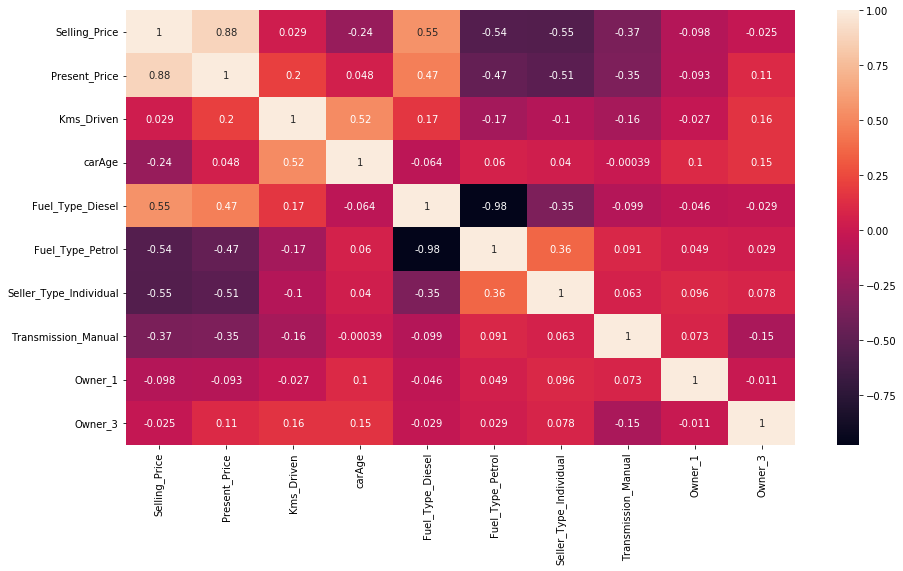

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True);

In [16]:
# Define X and y variables

X = df.iloc[:,1:]
y = df.iloc[:,0]

X.head()

,Present_Price,Kms_Driven,carAge,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1,Owner_3
0,5.59,27000,7,0,1,0,1,0,0
1,9.54,43000,8,1,0,0,1,0,0
2,9.85,6900,4,0,1,0,1,0,0
3,4.15,5200,10,0,1,0,1,0,0
4,6.87,42450,7,1,0,0,1,0,0


In [17]:
# get feature importance

ETR = ExtraTreesRegressor()
ETR.fit(X,y)

print(ETR.feature_importances_)

[3.88433010e-01 4.03779081e-02 7.46112501e-02 2.26747846e-01
 7.95562577e-03 1.30608483e-01 1.30782102e-01 3.54363730e-04
 1.29411829e-04]


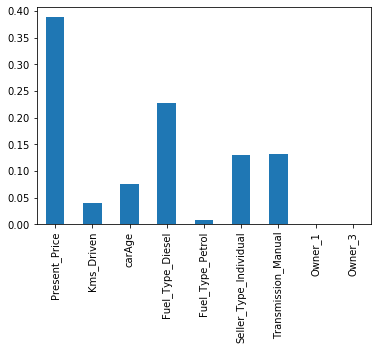

In [18]:
fet_imp_df = pd.Series(ETR.feature_importances_, index=X.columns)
fet_imp_df.plot(kind='bar');

In [19]:
regressor = RandomForestRegressor()

In [20]:
# define hyper parameters and use RandomizedSearchCV to find the best hyper parameters

n_estimators =[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [21]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf
            }

In [22]:
random_cv = RandomizedSearchCV(estimator=regressor, param_distributions=random_grid, scoring='neg_mean_squared_error',
                                n_iter=10, cv=5, n_jobs=1, verbose=2)

In [23]:
random_cv.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   2.7s
[CV] n_estimators=1200, min_samples_split=2

[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   3.4s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   3.5s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   3.1s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   3.2s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   3.7s
[CV] n_estimators=300, min_samples_split=2, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [24]:
hyper_params = random_cv.best_params_
hyper_params

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [25]:
regressor = RandomForestRegressor(n_estimators=hyper_params['n_estimators'],
                                  max_features=hyper_params['max_features'],
                                  min_samples_split=hyper_params['min_samples_split'],
                                  min_samples_leaf=hyper_params['min_samples_leaf'],
                                  max_depth=hyper_params['max_depth'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [27]:
regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=300)

In [28]:
y_pred = regressor.predict(X_test)

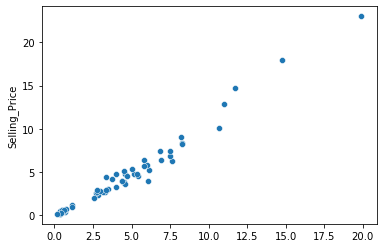

In [29]:
sns.scatterplot(x=y_pred, y=y_test);

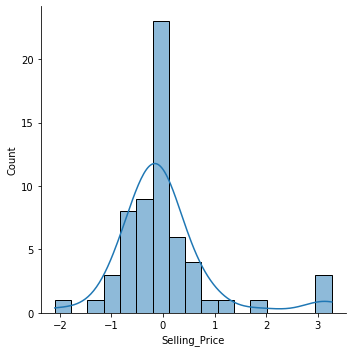

In [30]:
sns.displot(y_test - y_pred, kde=True);

In [31]:
print('MAE:', sklearn.metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', sklearn.metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.5637059192825996
MSE: 0.840834974387599
RMSE: 0.9169705417229056


In [32]:
import pickle

In [33]:
file = open('carSalesPredictor.pkl', 'wb')
pickle.dump(regressor, file)